In [39]:
import numpy as np

# Number of samples per class 
num_samples =200

# Generate blue class data 
blue_data = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_samples, 2)) 
# Generate red class data 
red_data = np.random.normal(loc=[-2, -2], scale=[1, 1], size=(num_samples, 2)) 

# Generate additional blue class data with mean at [2, -2] 
blue_data_extra1 = np.random.normal(loc=[2, -2], scale=[1, 1], size=(num_samples, 2)) 
# Generate additional red class data with mean at [-2, 2] 
red_data_extra1 = np.random.normal(loc=[-2, 2], scale=[1, 1], size=(num_samples, 2)) 

# Combine data and create labels 
X = np.vstack([blue_data, red_data, blue_data_extra1, red_data_extra1]) 
y = np.array([0] * (num_samples * 2) + [1] * (num_samples * 2))


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import svm

In [41]:
def plotDecisionBoundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.30)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
    plt.title("Classification data points prediction")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")

In [42]:
def decisionTree(X_train, y_train, X_test, y_test, max_depth):

    decision_tee_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    decision_tee_clf.fit(X_train, y_train)

    y_pred_dt = decision_tee_clf.predict(X_test)

    print(f'Classification Report: \n {classification_report (y_test, y_pred_dt)}')

    plotDecisionBoundary(decision_tee_clf, X_test, y_test)

    return y_pred_dt

In [43]:
#rbf kernel: K(x_1,x_2)=exp(−γ⋅‖x_1−x_2‖^2)

def svmClassification(X_train, y_train, X_test, y_test, gamma, C):
    svm_color_clf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
    svm_color_clf.fit(X_train, y_train)

    y_pred_svm = svm_color_clf.predict(X_test)

    print(f'Classification Report: \n {classification_report (y_test, y_pred_svm)}')

    plotDecisionBoundary(svm_color_clf, X_test, y_test)

    return y_pred_svm

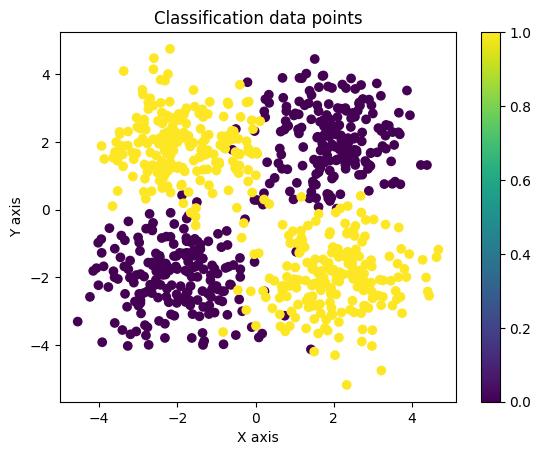

In [44]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Classification data points")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.colorbar()
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.19      0.31        97
           1       0.56      0.97      0.71       103

    accuracy                           0.59       200
   macro avg       0.71      0.58      0.51       200
weighted avg       0.70      0.59      0.51       200



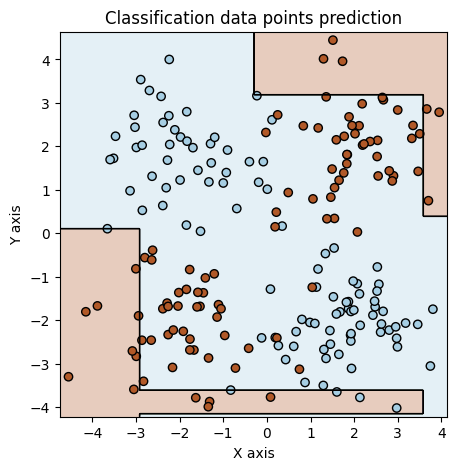

In [46]:
#Good fit
y_pred_dt = decisionTree(X_train, y_train, X_test, y_test, 5)

<Axes: >

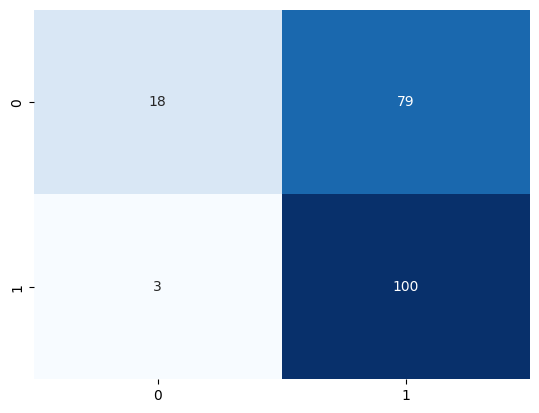

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.11      0.19        97
           1       0.52      0.92      0.67       103

    accuracy                           0.53       200
   macro avg       0.55      0.52      0.43       200
weighted avg       0.55      0.53      0.44       200



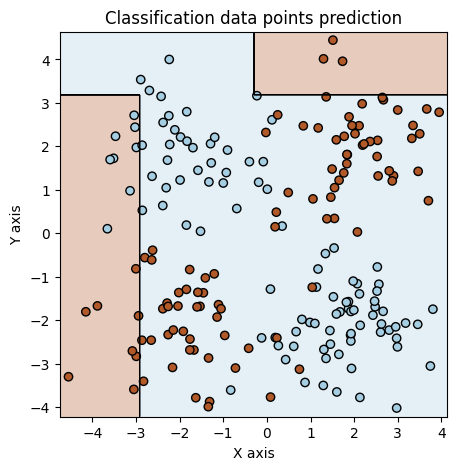

In [48]:
#Underfitting
y_pred_dt = decisionTree(X_train, y_train, X_test, y_test, 2)

<Axes: >

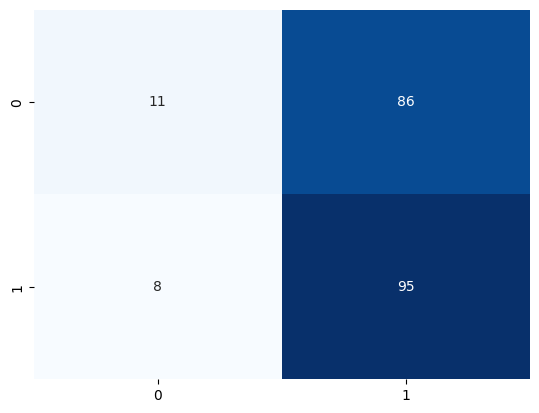

In [49]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        97
           1       0.93      0.96      0.94       103

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



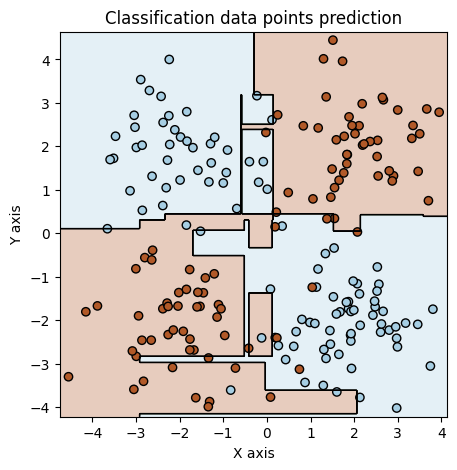

In [50]:
#Overfitting
y_pred_dt = decisionTree(X_train, y_train, X_test, y_test, 100000000000)

<Axes: >

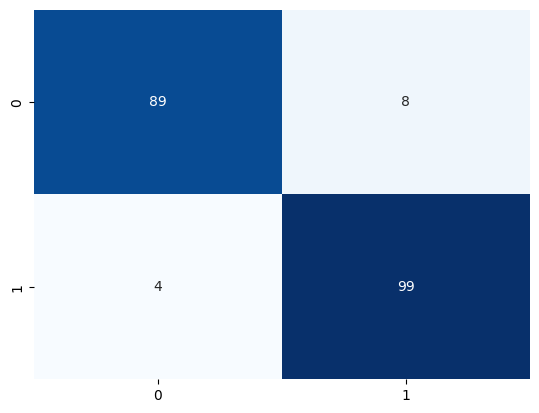

In [51]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        97
           1       0.94      0.99      0.96       103

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



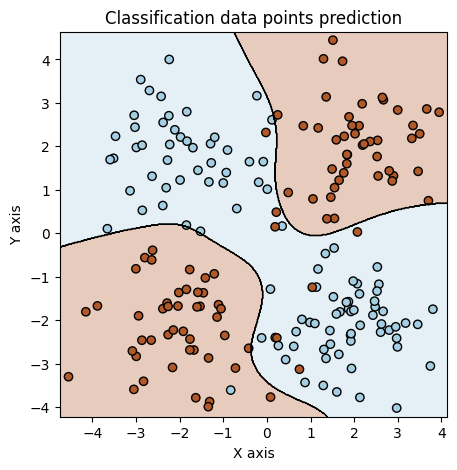

In [52]:
#######SVM#######
#Good fit
y_pred_svm = svmClassification(X_train, y_train, X_test, y_test, 0.1, 10000)

<Axes: >

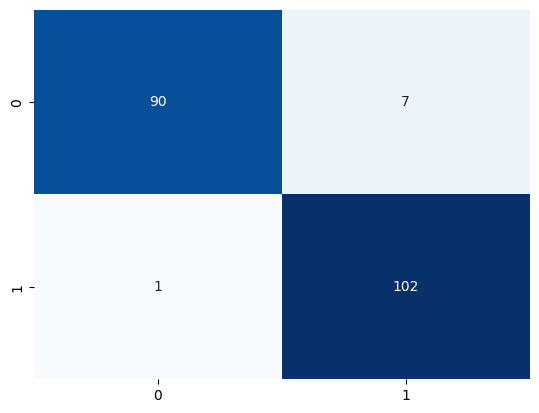

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        97
           1       1.00      0.56      0.72       103

    accuracy                           0.78       200
   macro avg       0.84      0.78      0.77       200
weighted avg       0.85      0.78      0.76       200



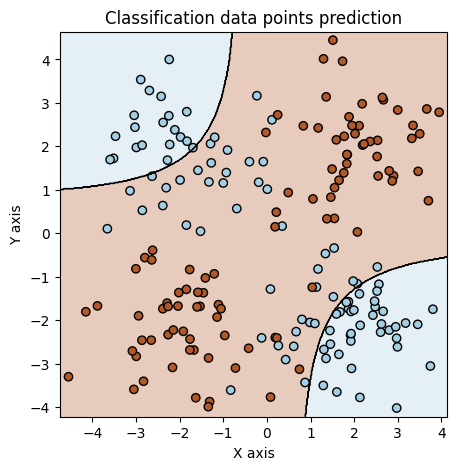

In [54]:
#Underfitting
y_pred_svm = svmClassification(X_train, y_train, X_test, y_test, 0.01, 0.1)

<Axes: >

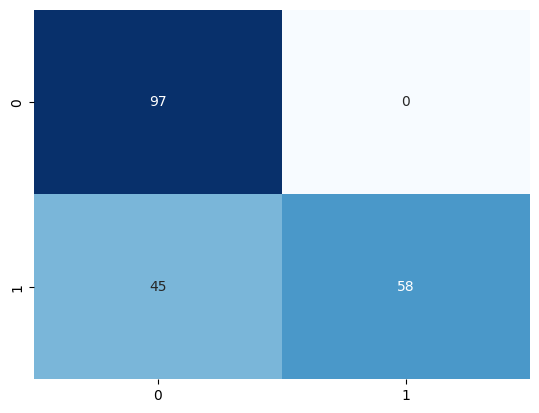

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.93      0.90      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



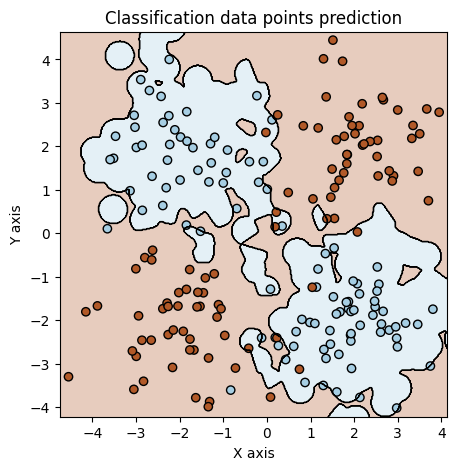

In [56]:
#Overfitting
y_pred_svm = svmClassification(X_train, y_train, X_test, y_test, 50, 10000)

<Axes: >

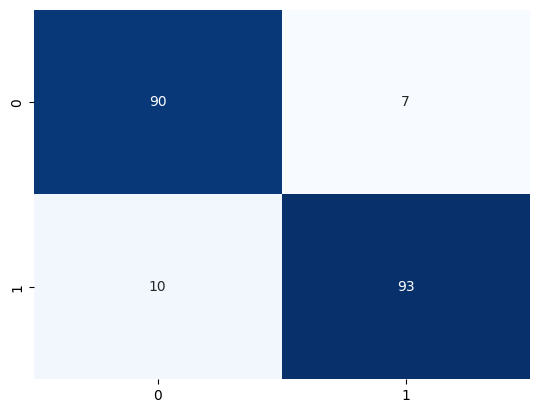

In [57]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cf_matrix, annot= True, fmt='d', cmap='Blues', cbar=False)